<a href="https://colab.research.google.com/github/jagrutimohanty/CMPE-258-DeepLearning/blob/master/CMPE-258-DeepLearning/Assignment3/CMPE_258_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment - 258 Homework 3 
Name :Jagruti Mohanty

# **part a implementation is as follows**
Using pure Numpy to build a 3 layer neural network with relu activation

In [1]:
pip install torchvision

In [2]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [3]:
!python --version

Python 3.7.10


In [4]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


In [5]:
pip install git+git://github.com/Theano/Theano.git

  Cloning git://github.com/Theano/Theano.git to /tmp/pip-req-build-z55pcgoq
  Running command git clone -q git://github.com/Theano/Theano.git /tmp/pip-req-build-z55pcgoq
  Created wheel for Theano: filename=Theano-1.0.5+2.g8e9611715-cp37-none-any.whl size=2668286 sha256=a6d6550e23ee1d3b089a8b390e40389911cb6c073678411461f873421ad552a1
  Stored in directory: /tmp/pip-ephem-wheel-cache-qw8s9ilv/wheels/ae/32/7c/62beb8371953eb20c271b3bac7d0e56e1a2020d46994346b52
Successfully built Theano
  Found existing installation: Theano 1.0.5
    Uninstalling Theano-1.0.5:
      Successfully uninstalled Theano-1.0.5


In [7]:
import numpy as np
from typing import Callable
from matplotlib.pyplot import *
from mpl_toolkits import mplot3d

#this is the input data choosen with random uniform numbers and weights and bias initialized 
n = 200
d = 3
x = np.random.uniform(-1, 1, (n, d))
weights_true_1 = np.array([[5, 1, 2],]).T
bias_true_1 = np.array([1])
y_tr1 = (x ** 3) @ weights_true_1 + x @ weights_true_1 + bias_true_1

weights_true_2 = np.array([[4, 1, 3],]).T
bias_true_2 = np.array([2])
y_tr2 = (x ** 3) @ weights_true_2 + x @ weights_true_2 + bias_true_2

weights_true = np.array(weights_true_1+weights_true_2)
bias_true = np.array(bias_true_1+bias_true_2)
y_true = np.hstack((y_tr1, y_tr2))

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')


x: (200, 3), weights: (3, 1), bias: (1,), y: (200, 2)


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


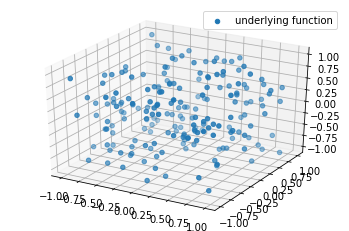

In [8]:
#used the matplotlin pyplot to plot the input and output data 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], x[:, 2], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], x[:, 2], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

In [9]:
#from scratch defined the loss function , backward propagation and linear classes 

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [10]:
#tested for a smaller sample data
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_tr1))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_tr1))

26.840419570139694
23.032335076736718


In [11]:
  # This is to plot the output values
  
  def plot_3d(x, y, y_pred=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], x[:, 2],y, label='underlying function')
    if y_pred is not None:
      ax.scatter(x[:, 0], x[:, 1],x[:, 2], y_pred, label='our function')
    plt.legend()


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


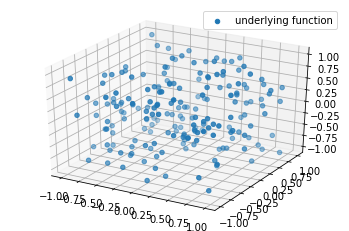

In [12]:
plot_3d(x, y_true)

### Adding non-linearity: ReLU and defining the numpy model from scratch

In [13]:
#this is to define the custom nonlinearity activation function
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    def backward(self , output_gradient):
        self.input_gradient = (self.input_ > 0 ) * output_gradient
        return self.input_gradient

In [17]:
class Model:
  def __init__(self, input_dim, num_hiddenlr1, num_hiddenlr2):
    self.linear1 = Linear(input_dim, num_hiddenlr1)
    self.relu1 = Relu()
    self.linear2 = Linear(num_hiddenlr1, num_hiddenlr2)
    self.relu2 = Relu()
    self.linear3 = Linear(num_hiddenlr2 , 2)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu1(l1)

    l2 = self.linear2(r)
    r = self.relu2(l2)

    l3 = self.linear3(r)
    return l3
  
  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)

    linear2_gradient = self.linear2.backward(relu2_gradient)
    relu1_gradient = self.relu1.backward(linear2_gradient)

    linear1_gradient = self.linear1.backward(relu1_gradient)
    return linear1_gradient

  def update(self, lr):

    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

In [26]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 10, 50)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

28.10254841938315
16.035133966059973


Epoch 0, loss 16.035133966059973
Epoch 1, loss 61.95392175710675
Epoch 2, loss 4359.788035740777
Epoch 3, loss 11279.625846150124
Epoch 4, loss 8.510176166427e+17
Epoch 5, loss 9.855824008321592e+38
Epoch 6, loss 1.5769318412395592e+38
Epoch 7, loss 5.676954628462394e+37
Epoch 8, loss 2.0437036662464678e+37
Epoch 9, loss 7.357333198487289e+36
Epoch 10, loss 2.648639951455417e+36
Epoch 11, loss 9.535103825239514e+35
Epoch 12, loss 3.432637377086212e+35
Epoch 13, loss 1.2357494557510364e+35
Epoch 14, loss 4.448698040703735e+34
Epoch 15, loss 1.6015312946533464e+34
Epoch 16, loss 5.765512660752014e+33
Epoch 17, loss 2.0755845578707187e+33
Epoch 18, loss 7.472104408334582e+32
Epoch 19, loss 2.6899575870004406e+32
Epoch 20, loss 9.68384731320163e+31
Epoch 21, loss 3.486185032752601e+31
Epoch 22, loss 1.255026611790936e+31
Epoch 23, loss 4.5180958024473826e+30
Epoch 24, loss 1.6265144888810577e+30
Epoch 25, loss 5.855452159971812e+29
Epoch 26, loss 2.1079627775898523e+29
Epoch 27, loss 7.588

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


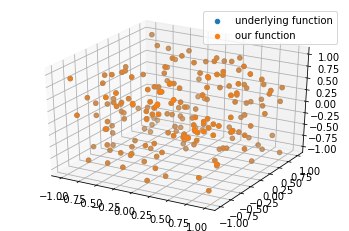

In [27]:

#this function is defined to fit the model and run it for several epochs 
def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

#this is to plot the true value vs the predicted values in higher dimension space
fit(x, y_true, model=model, loss=loss, lr=0.2, num_epochs=200)
plot_3d(x, y_true,y_pred)

# **part b implementation is as follows**


### 1) Implemented pytorch with relu nonlinearity for the 3 layer neural network 

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [33]:
class Neural_Network(nn.Module):
    def __init__(self, ):
        super(Neural_Network, self).__init__()
        # parameters
        # TODO: parameters can be parameterized instead of declaring them here
        self.inputSize = 3
        self.outputSize = 2
        self.hiddenSize = 5
        
        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize) # 2 X 3 tensor
        self.W2 = torch.randn(self.hiddenSize, self.outputSize) # 3 X 1 tensor
        
    def forward(self, X):
        self.z = torch.matmul(X, self.W1) # 3 X 3 ".dot" does not broadcast in PyTorch
        self.z2 = self.relu(self.z) # activation function
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3) # final activation function
        return o
        
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))

    def relu(self,s):
         return np.maximum(0,s)

    def sigmoidPrime(self, s):
        # derivative of sigmoid
        return s * (1 - s)

    def reluPrime(self, s):
        # derivative of sigmoid
   
        s[s<=0] = 0
        s[s>0] = 1
        return s
        
    def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)

    
    def backward(self, X, y, o ,lr =0.5):
        self.o_error = y - o # error in output
        self.o_delta = self.o_error * self.reluPrime(o) # derivative of sig to error
        self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
        self.z2_delta = self.z2_error * self.reluPrime(self.z2)

        self.W1 += lr * torch.matmul(torch.t(X), self.z2_delta)
        self.W2 += lr * torch.matmul(torch.t(self.z2), self.o_delta)
        
    def train(self, X, y ,lr=0.5):
        # forward + backward pass for training
        o = self.forward(X)
        self.backward(X, y, o ,lr =0.5)
 #   def update(self,lr):
 #       self.W1 = self.W1 - lr * self.weights_gradient 
 #       self.bias = self.bias - lr * self.bias_gradient
        
    def saveWeights(self, model):
       
        torch.save(model, "NN")
      
        
    def predict(self):
        print ("Predicted data based on trained weights: ")
        print ("Input (scaled): \n" + str(xPredicted))
        print ("Output: \n" + str(self.forward(xPredicted)))

In [34]:
X_tf = torch.tensor((x), dtype=torch.float) # 3 X 2 tensor
y_tf = torch.tensor((y_true), dtype=torch.float) # 3 X 1 tensor
xPredicted = torch.tensor(([1,1,1]), dtype=torch.float) # 1 X 2 tensor
print(X_tf.size())
print(y_tf.size())
print(xPredicted)

torch.Size([200, 3])
torch.Size([200, 2])
tensor([1., 1., 1.])


In [36]:

NN = Neural_Network()
ll=[]
for i in range(100):  # trains the NN 100 times
    los = str(torch.mean((y_tf - NN(X_tf))**2).detach().item())
    print ("#" + str(i) + " Loss: " +los )  # mean sum squared loss
    ll.append(los)
    NN.train(X_tf, y_tf ,lr=0.7)
NN.saveWeights(NN)
NN.predict()

#0 Loss: 26.850257873535156
#1 Loss: 26.361867904663086
#2 Loss: 24.633081436157227
#3 Loss: 25.87264633178711
#4 Loss: 24.558961868286133
#5 Loss: 24.606809616088867
#6 Loss: 24.608457565307617
#7 Loss: 24.612585067749023
#8 Loss: 24.61646270751953
#9 Loss: 24.623550415039062
#10 Loss: 24.628192901611328
#11 Loss: 24.628192901611328
#12 Loss: 24.628192901611328
#13 Loss: 24.628192901611328
#14 Loss: 24.628192901611328
#15 Loss: 24.628192901611328
#16 Loss: 24.628192901611328
#17 Loss: 24.628192901611328
#18 Loss: 24.628192901611328
#19 Loss: 24.628192901611328
#20 Loss: 24.628192901611328
#21 Loss: 24.634292602539062
#22 Loss: 24.634292602539062
#23 Loss: 24.634292602539062
#24 Loss: 24.634292602539062
#25 Loss: 24.634851455688477
#26 Loss: 24.634292602539062
#27 Loss: 24.634292602539062
#28 Loss: 24.634292602539062
#29 Loss: 24.634292602539062
#30 Loss: 24.634292602539062
#31 Loss: 24.634851455688477
#32 Loss: 24.634292602539062
#33 Loss: 24.634292602539062
#34 Loss: 24.6342926025390

### 2)Implemented using pytorch from scratch to build 3 layer neural network with relu non linearity with auto differentiation primitives

In [ ]:
class MyTorchModel(nn.Module):
  def __init__(self, input_dim, num_hiddenlayer1, num_hiddenlayer2):
    super(MyTorchModel, self).__init__()
    self.linear1 = nn.Linear(input_dim , num_hiddenlayer1)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(num_hiddenlayer1 , num_hiddenlayer2)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(num_hiddenlayer2,2)

  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu1(l1)
    l2 = self.linear2(r)
    r = self.relu2(l2)
    l3 = self.linear3(r)
    return l3


In [ ]:
loss = nn.MSELoss()
model = MyTorchModel(d, 10, 50)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(27.8375, grad_fn=<MseLossBackward>)


In [ ]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(27.8375, grad_fn=<MseLossBackward>)
tensor(26.5526, grad_fn=<MseLossBackward>)


In [ ]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)

tensor(26.5526, grad_fn=<MseLossBackward>)
tensor(25.3895, grad_fn=<MseLossBackward>)
tensor(23.8158, grad_fn=<MseLossBackward>)
tensor(21.2429, grad_fn=<MseLossBackward>)
tensor(16.8635, grad_fn=<MseLossBackward>)
tensor(10.7095, grad_fn=<MseLossBackward>)
tensor(5.8923, grad_fn=<MseLossBackward>)
tensor(3.5574, grad_fn=<MseLossBackward>)
tensor(2.7123, grad_fn=<MseLossBackward>)
tensor(4.3752, grad_fn=<MseLossBackward>)
tensor(52.3245, grad_fn=<MseLossBackward>)
tensor(75.6823, grad_fn=<MseLossBackward>)
tensor(27.0366, grad_fn=<MseLossBackward>)
tensor(26.6180, grad_fn=<MseLossBackward>)
tensor(26.2884, grad_fn=<MseLossBackward>)
tensor(25.9934, grad_fn=<MseLossBackward>)
tensor(25.7038, grad_fn=<MseLossBackward>)
tensor(25.3749, grad_fn=<MseLossBackward>)
tensor(24.9177, grad_fn=<MseLossBackward>)
tensor(24.1477, grad_fn=<MseLossBackward>)
tensor(22.7324, grad_fn=<MseLossBackward>)
tensor(20.0175, grad_fn=<MseLossBackward>)
tensor(15.6973, grad_fn=<MseLossBackward>)
tensor(12.0319,

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


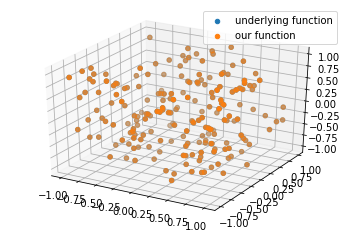

In [ ]:
plot_3d(x, y_true, model(x_tensor).detach())

### 3)Implemented pytorch modules with high level primitives for 3 layer neural ntwrok with relu nonlinearity 

In [ ]:
#### using high level premitives doing the pytorch implementation
#Installing pytorch lighting
%%capture
! pip install git+https://github.com/PytorchLightning/pytorch-lightning.git@master --upgrade 

In [ ]:
import os

import torch
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

import pytorch_lightning as pl


class CoolSystem(pl.LightningModule):
  

    def __init__(self,classes=2):
        super(CoolSystem,self).__init__()
       # self.save_hyperparameters()
        self.save_hyperparameters()
        # not the best model...
        self.layer1 = torch.nn.Linear(3, 12)
        self.layer2 = torch.nn.Linear(12, 24)
        self.layer3 = torch.nn.Linear(24, 24)
        self.layer4 = torch.nn.Linear(24, 2)
        
           # Log hyperparameters
        

    def forward(self, x):
        # x = x.view(x.size(0),-1)

         x = self.layer1(x)
         x = torch.relu(x)

         x = self.layer2(x)
         x = torch.relu(x)

         x = self.layer3(x)
         x = torch.relu(x)


         x = self.layer4(x)

         return x

#torch.relu(self.l1(x.view(x.size(0), -1)))
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        #loss = F.cross_entropy(y_hat, y)
        loss= F.mse_loss(y_hat, y)   
        tensorboard_logs = {'train_loss': loss}
        return {'loss': loss, 'log': tensorboard_logs}

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
      #  loss = F.cross_entropy(y_hat, y)
        loss= F.mse_loss(y_hat, y)  
        return {'val_loss': loss}

    def validation_epoch_end(self, outputs):
        avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        return {'val_loss': avg_loss}

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

In [ ]:
from pytorch_lightning import Trainer, seed_everything
seed_everything(0)

Global seed set to 0


0

In [ ]:
import tensorflow as tf


x_tensor

dataset  = tf.concat([x_tensor, y_true_tensor], 1)
dataset[:20]

<tf.Tensor: shape=(20, 5), dtype=float32, numpy=
array([[  0.18929537,   0.85728496,   0.43970406,   4.51716   ,
          5.845798  ],
       [  0.53472173,   0.9017862 ,   0.26818216,   6.6481423 ,
          7.247999  ],
       [  0.15546188,   0.20373595,   0.73161054,   4.2547045 ,
          6.2186933 ],
       [ -0.22380193,   0.59067243,   0.30451387,   1.2871988 ,
          2.8549614 ],
       [ -0.3908569 ,  -0.97262317,  -0.58016   ,  -4.6964264 ,
         -4.021292  ],
       [  0.39997754,   0.15938061,  -0.4508106 ,   2.398405  ,
          2.3920095 ],
       [ -0.13139506,   0.32229754,  -0.74582773,  -1.6339436 ,
         -1.660981  ],
       [ -0.13544084,  -0.16675156,   0.08520204,   0.31062585,
          1.5343719 ],
       [  0.04382736,  -0.26454663,   0.5254673 ,   2.277611  ,
          3.9042566 ],
       [ -0.86554193,  -0.9289231 ,  -0.15948132,  -8.627433  ,
         -6.2769966 ],
       [  0.7933885 ,  -0.4448613 ,  -0.6553813 ,   5.0573273 ,
          3.82764

In [ ]:


from sklearn.model_selection import train_test_split
y = np.hstack((y_tr1, y_tr2))
y.shape
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1)

# From numpy to torch tensors
x_train = torch.from_numpy(x_train).type(torch.FloatTensor)
y_train = torch.from_numpy(y_train).type(torch.FloatTensor)

# From numpy to torch tensors
x_val = torch.from_numpy(x_val).type(torch.FloatTensor)
y_val = torch.from_numpy(y_val).type(torch.FloatTensor)

# Implements Dataset and DataLoader
train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=5)


# Implements Dataset and DataLoader
val_dataset = torch.utils.data.TensorDataset(x_val, y_val)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=5)

In [ ]:

# model
from pytorch_lightning import Trainer

model = CoolSystem()

# most basic trainer, uses good defaults]
#num_tpu_cores=8,
trainer = Trainer( progress_bar_refresh_rate=20, max_epochs=10)
trainer.fit(model,train_dataloader,val_dataloader)
# Testing the model
trainer.test()


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name   | Type   | Params
----------------------------------
0 | layer1 | Linear | 48    
1 | layer2 | Linear | 312   
2 | layer3 | Linear | 600   
3 | layer4 | Linear | 50    
----------------------------------
1.0 K     Trainable params
0         Non-trainable params
1.0 K     Total params
0.004     Total estimated model params size (MB)


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:52: UserWarning: The validation_epoch_end should not return anything as of 9.1. To log, use self.log(...) or self.write(...) directly in the LightningModule
  warnings.warn(*args, **kwargs)


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:52: UserWarning: The {log:dict keyword} was deprecated in 0.9.1 and will be removed in 1.0.0
Please use self.log(...) inside the lightningModule instead.
# log on a step or aggregate epoch metric to the logger and/or progress bar (inside LightningModule)
self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True)
  warnings.warn(*args, **kwargs)


1

# *part c implementation is as follows*


### 1)Implemented the tensor from scratch to build a 3 layer neural network with relu nonlinearity 

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf
import tensorflow 
from tensorflow import keras
from keras.layers import Dense

#After importing build the linear layer

class Linear(keras.layers.Layer):

  def __init__(self, units=32):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_normal',
                               trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='random_normal',
                               trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b


# Instantiate our lazy layer.
linear_layer = Linear(3)

# This will also call `build(input_shape)` and create the weights.
y = linear_layer(tf.ones((2, 2)))
assert len(linear_layer.weights) == 2

In [ ]:


x_train = tf.Variable(x, trainable=True, dtype=tf.float32)

y = np.hstack((y_tr1, y_tr2))
y.shape
y_train = tf.Variable(y, trainable=True, dtype=tf.float32)


#preparing datasets for the keras model

dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
dataset

<TensorSliceDataset shapes: ((3,), (2,)), types: (tf.float32, tf.float32)>

##### Added custom loss function instead of using the predefined one

In [ ]:
def custom_loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

In [ ]:

# Instantiation of the keras model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

In [ ]:
#keras layers 
class MLP(keras.layers.Layer):

  def __init__(self):
    super(MLP ,self).__init__()
    self.linear_1 = Linear(3)
    self.linear_2 = Linear(10)
    self.linear_3 = Linear(2)
    

  def call(self,inputs):
    l1=self.linear_1(inputs)
    r=tf.nn.relu(l1)

    l2=self.linear_2(r)
    r=tf.nn.relu(l2) 
    
    l3=self.linear_3(r)

    return l3


In [ ]:
# This step is to check the output for the model

mlp = MLP()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
#for step, (x,y) in enumerate(dataset):
with tf.GradientTape() as tape:
  #open a gradient tape 

  #forward pass
    logits = mlp(x_train)
  #loss value for this batch
    loss_value = custom_loss_function(y_train , logits)
    print(loss_value)

#get the gradient of loss wrt the weights

gradient = tape.gradient(loss_value , mlp.trainable_weights)


#Update the weights of linear layer
optimizer.apply_gradients(zip(gradient , mlp.trainable_weights))


#loss_value

tf.Tensor(
[5.21705093e+01 3.66043139e+00 2.32383537e+00 2.52976131e+01
 9.99364662e+00 6.46020603e+00 1.33546352e+01 2.83955402e+01
 2.72876644e+00 3.82036972e+01 7.02421646e+01 1.53013515e+00
 2.21938467e+00 8.75352020e+01 1.18456519e+00 1.66008034e+01
 3.60235672e+01 5.62856255e+01 5.50129175e+00 1.51462975e+01
 4.31453323e+01 8.70963135e+01 2.01358833e+01 5.33156729e+00
 1.21229229e+01 2.23472576e+01 8.16680145e+01 2.77813377e+01
 7.63579082e+00 9.84508133e+00 5.28478355e+01 1.59465766e+00
 1.69487782e+01 2.84323245e-02 4.74493790e+01 1.32219398e+00
 2.64467672e-02 8.90082645e+00 8.60423584e+01 1.20017827e+00
 6.55085297e+01 4.12259531e+00 7.82620764e+00 7.74653721e+00
 1.27298832e+01 3.01075983e+00 3.58821249e+00 3.90977745e+01
 1.15340195e+01 1.42071564e+02 9.83419061e-01 5.45977712e-01
 1.79579067e+01 1.41260937e-01 1.60042114e+01 4.28550529e+00
 1.40144165e+02 6.68351135e+01 5.35199890e+01 4.61691666e+01
 5.09131002e+00 1.87475252e+00 2.19199324e+00 2.94053841e+00
 5.41175699e+

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

### 2) Implemented keras tensor with the auto differentiation primitives to build the neural netwrok model with relu non linearity 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
#implementing the layers in keras for the regression model
inputs = keras.Input(shape=(3,))
layer1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
layer2 = layers.Dense(30, activation='relu', name='dense_2')(layer1)
outputs = layers.Dense(2, name='regression')(layer2)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
regression (Dense)           (None, 2)                 62        
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
## Compile the model and ran with the loss function and optimizers 

model.compile(loss='mse', optimizer=optimizers.SGD(0.1))
model.fit(x, y_true, epochs=100)
y_pred = model.predict(x)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 25.4343
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 26.1224
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 18.7160
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 4.5016
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 4.7811
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 5.0574
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 2.7423
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 2.8017
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 2.1682
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 1.1628
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 1.3496
Epoch 12/100
7/7 [==============================] - 0s 2ms/step - loss: 1.9370
Epoch 13/100
7/7 [==============================] - 0s 2ms

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


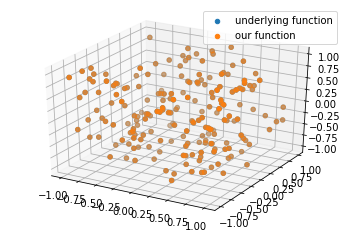

In [ ]:
plot_3d(x, y_true, y_pred)

### 3) Implemented with model subclassing the keras linear modules datastructure to build 3 layer NN

In [ ]:
# Preparation of the datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

# Instantiating a simple regression model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

In [ ]:
#model ran for multiple epochs
model.fit(dataset, epochs=3)

Epoch 1/3
938/938 [==============================] - 5s 5ms/step - loss: 0.4023 - sparse_categorical_accuracy: 0.8818
Epoch 2/3
938/938 [==============================] - 4s 5ms/step - loss: 0.0956 - sparse_categorical_accuracy: 0.9702
Epoch 3/3
938/938 [==============================] - 4s 5ms/step - loss: 0.0604 - sparse_categorical_accuracy: 0.9814


In [ ]:

#creation of validation dataset
x_test = x_test[:].reshape(10000, 784).astype('float32') / 255
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(128)

loss, acc = model.evaluate(test_dataset)
print('loss: %.3f - acc: %.3f' % (loss, acc))

79/79 [==============================] - 0s 3ms/step - loss: 0.0962 - sparse_categorical_accuracy: 0.9716
loss: 0.096 - acc: 0.972


In [ ]:
# Instantiated the model with layers for the regression model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate the loss function 
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[accuracy])

# Instantiate some callbacks
callbacks = [tf.keras.callbacks.EarlyStopping(),
             tf.keras.callbacks.ModelCheckpoint(filepath='my_model.keras',
                                                save_best_only=True)]
#Fit the model and ran it for multiple epochs
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=30,
          batch_size=64,
          callbacks=callbacks)

Epoch 1/30
938/938 [==============================] - 5s 5ms/step - loss: 0.3905 - sparse_categorical_accuracy: 0.8859 - val_loss: 0.0971 - val_sparse_categorical_accuracy: 0.9685
Epoch 2/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0876 - sparse_categorical_accuracy: 0.9732 - val_loss: 0.0734 - val_sparse_categorical_accuracy: 0.9776
Epoch 3/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0554 - sparse_categorical_accuracy: 0.9819 - val_loss: 0.0780 - val_sparse_categorical_accuracy: 0.9761


### References followed :
1)Class PPT 
2)https://towardsdatascience.com/pytorch-lightning-making-your-training-phase-cleaner-and-easier-845c4629445b
3)https://discuss.pytorch.org/t/multiple-outputs-of-a-nn/68946
4)https://discuss.pytorch.org/t/a-model-with-multiple-outputs/10440

5)https://medium.com/dair-ai/a-simple-neural-network-from-scratch-with-pytorch-and-google-colab-c7f3830618e0

